# Bernstein-Vazirani Algorithm

The Bernstein-Vazirani Algorithm allows you to guess an n-bit number in one try, instead of n tries.

We'll create a number with n bits, and a quantum circuit. "n" classical bits are necessary to measure the guessed number. (n + 1) qubits are required. n qubits are used to store the number, and an additional one for the mathematics behind the algorithm.

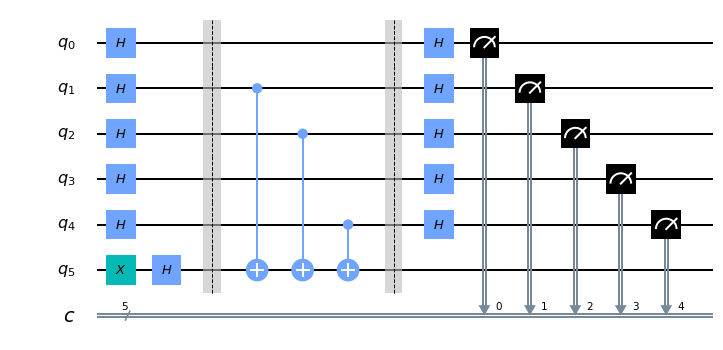

In [30]:
import qiskit
from qiskit.tools import visualization

num = '10110'
circuit = qiskit.QuantumCircuit(len(num) + 1, len(num))
circuit.x(len(num))
circuit.h(range(len(num) + 1))
circuit.barrier()
for qubit, bit in enumerate(reversed(num)):
    if bit == '1':
        circuit.cx(qubit, len(num))
circuit.barrier()
circuit.h(range(len(num)))
circuit.measure(range(len(num)), range(len(num)))
circuit.draw(output='mpl')

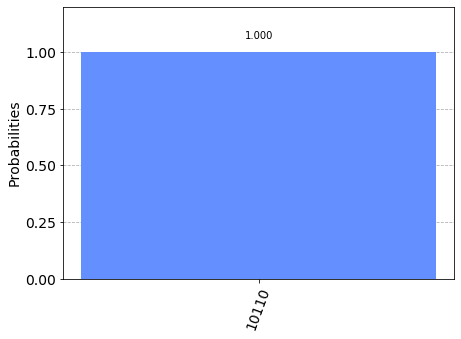

In [31]:
result = qiskit.execute(circuit, backend=qiskit.Aer.get_backend('qasm_simulator')).result()
visualization.plot_histogram(result.get_counts())

As we can see, the number is guessed correctly every time.